In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# from sklearn.datasets import load_svmlight_file
# features, labels = load_svmlight_file('diabetes_scale')

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
bad_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[bad_columns] = df[bad_columns].replace(0,np.NaN)
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [5]:
for col in bad_columns:
    df[col].fillna(df[col].median(), inplace=True)

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
import seaborn as sns

In [7]:
# sns.pairplot(df, hue = "Outcome")

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis = 1) # independent features
y = df["Outcome"]  #dependent features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [11]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [12]:
# X_train = pd.DataFrame(X_train.toarray())
# X_test = pd.DataFrame(X_test.toarray())
# # y_train = pd.DataFrame(y_train.toarray())
# # y_test = pd.DataFrame(y_test.toarray())

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [14]:
X_train[0]

array([  2.   ,  84.   ,  72.   ,  29.   , 125.   ,  32.3  ,   0.304,
        21.   ])

In [24]:
from statistics import mean


class Perceptron:
    """
    Perceptron Classifier:
    
    Parameters:
    -----------
    learning_rate: float number, default 0.01
        Learning rate of the model, between 0.0 and 1.0
    
    epochs: integer number, default 1000
        Number of passes over the trainin set
    
    Attributes:
    -----------
    weight: 1D Numpy array, default None
        Weight after fitting
    
    bias: integer number, default None
        Bias in each epoch
        
    activation_function: unit step function
        Activation function of the model
    """
    def __init__(self, learning_rate = 0.001, epochs = 10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation_function = self.unit_step_function
        self.weight = None
        self.bias = None
        
        self.history = []
    
    def unit_step_function(self, X):
        return np.where(X >= 0, 1, 0)
    
    def fit(self, X, y):
        n_rows, n_cols = X.shape
        # initial weight value
        self.weight = np.zeros(n_cols) 
        self.bias = 0
        
        for _ in range(self.epochs):   
            for index, x in enumerate(X):                
                y_pred = self.predict(x)
            
                update = self.learning_rate * (y[index] - y_pred)
                self.weight += update * x
                self.bias += update
            
            pred = self.predict(X)
            self.history.append(accuracy_score(y, pred))   
            
                      
    def predict(self, X):
        output = np.dot(X, self.weight) + self.bias
        # print(output)
        y_pred = self.activation_function(output)
        return y_pred
    
    def get_acc(self):
        best_acc = np.max(self.history)
        mean_acc = np.mean(self.history)
        return best_acc, mean_acc
    

In [25]:

epochs = [100, 500, 1000, 10000]
learning_rates = [0.1, 0.01, 0.001]

results = []

print("----------------Start Training----------------")
for epo in epochs:
    print("--------  Current Epochs: {}  --------".format(epo))
    for lr in learning_rates:
        print("--------  Current Learning Rate: {}  --------".format(lr))
        model = Perceptron(lr, epo)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        result_dict = {"Epochs" : epo, "Learning_rate" : lr, "Test_accuracy" : test_acc, "Mean_train_accuracy" : model.get_acc()[1], "Best_train_accuracy" : model.get_acc()[0]}        
        results.append(result_dict)
        
print("----------------End Training----------------")
        
        

----------------Start Training----------------
--------  Current Epochs: 100  --------
--------  Current Learning Rate: 0.1  --------
--------  Current Learning Rate: 0.01  --------
--------  Current Learning Rate: 0.001  --------
--------  Current Epochs: 500  --------
--------  Current Learning Rate: 0.1  --------
--------  Current Learning Rate: 0.01  --------
--------  Current Learning Rate: 0.001  --------
--------  Current Epochs: 1000  --------
--------  Current Learning Rate: 0.1  --------
--------  Current Learning Rate: 0.01  --------
--------  Current Learning Rate: 0.001  --------
--------  Current Epochs: 10000  --------
--------  Current Learning Rate: 0.1  --------
--------  Current Learning Rate: 0.01  --------
--------  Current Learning Rate: 0.001  --------
----------------End Training----------------


In [26]:
results_df = pd.DataFrame(results)
results_df

,Epochs,Learning_rate,Test_accuracy,Mean_train_accuracy,Best_train_accuracy
0,100,0.100,0.649351,0.552362,0.675896
1,100,0.010,0.649351,0.552362,0.675896
2,100,0.001,0.649351,0.552362,0.675896
3,500,0.100,0.409091,0.543104,0.695440
4,500,0.010,0.409091,0.543104,0.695440
5,500,0.001,0.409091,0.543104,0.695440
6,1000,0.100,0.428571,0.530951,0.695440
7,1000,0.010,0.428571,0.530951,0.695440
8,1000,0.001,0.428571,0.530951,0.695440
9,10000,0.100,0.662338,0.576763,0.749186


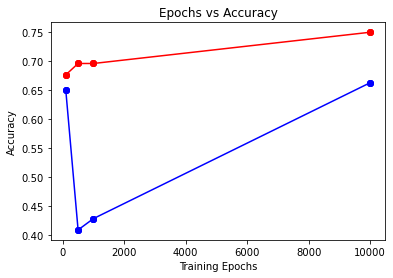

In [29]:
plt.plot(results_df["Epochs"], results_df["Best_train_accuracy"], marker = "o", color = "r")
plt.plot(results_df["Epochs"], results_df["Test_accuracy"], marker = "o", color = "b")
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.show()

In [22]:
best_model = Perceptron(0.1, 10000)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [31]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(train_acc)
print(test_acc)

0.6938110749185668
0.6623376623376623


In [32]:
print(classification_report(y_test, y_test_pred, labels = [0, 1]))
print(classification_report(y_train, y_train_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.57      0.68        99
           1       0.52      0.84      0.64        55

    accuracy                           0.66       154
   macro avg       0.69      0.70      0.66       154
weighted avg       0.74      0.66      0.67       154

              precision    recall  f1-score   support

           0       0.88      0.62      0.72       401
           1       0.54      0.84      0.66       213

    accuracy                           0.69       614
   macro avg       0.71      0.73      0.69       614
weighted avg       0.76      0.69      0.70       614



In [ ]:
# plt.figure(figsize=(8,6))
# cm = confusion_matrix(y_test, model_pred)
# sns.heatmap(cm, annot = True)

In [ ]:
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, model_pred)
# plt.plot(fpr, tpr, marker = "o")
# plt.title("ROC curve for model predictions")
# plt.show()

In [ ]:
# model.plot_history()